# K Means Clustering Algorithm

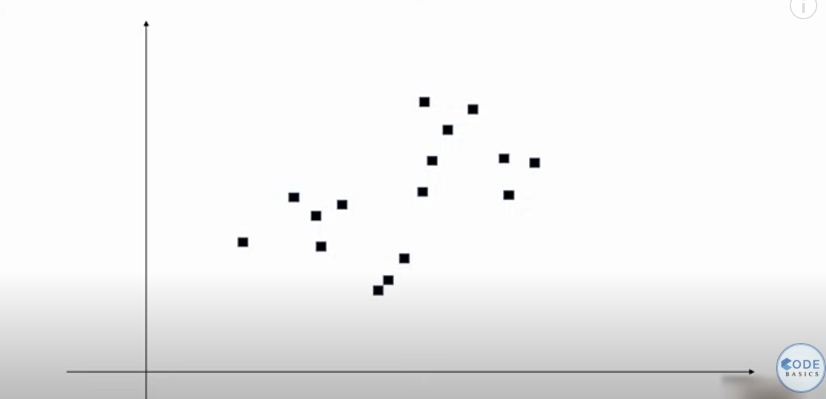

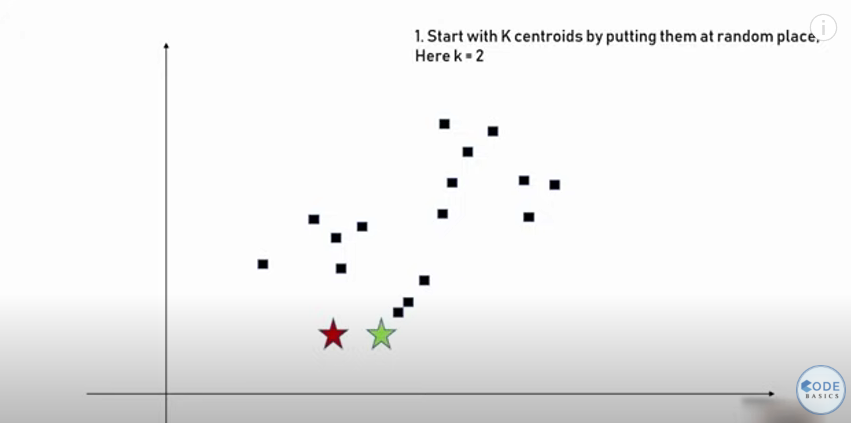

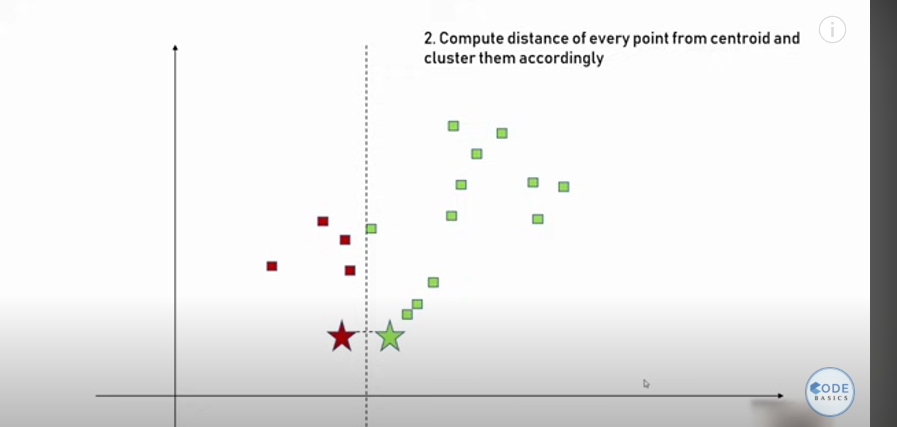

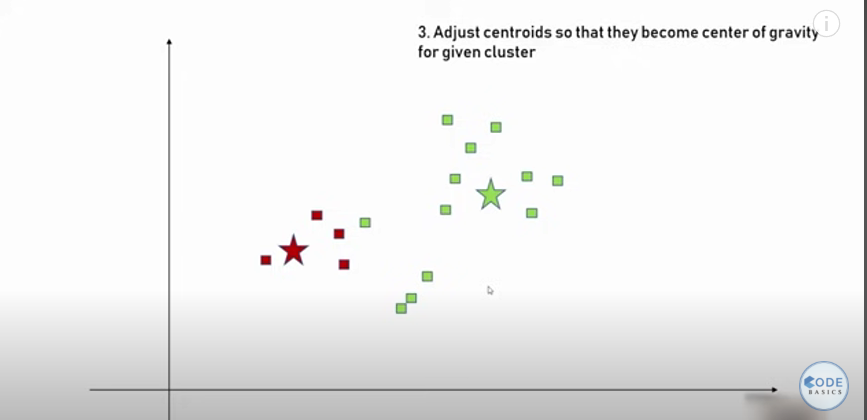

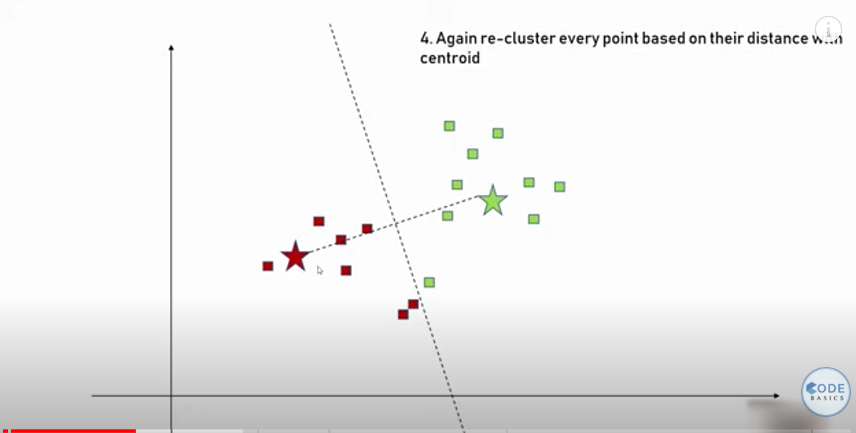

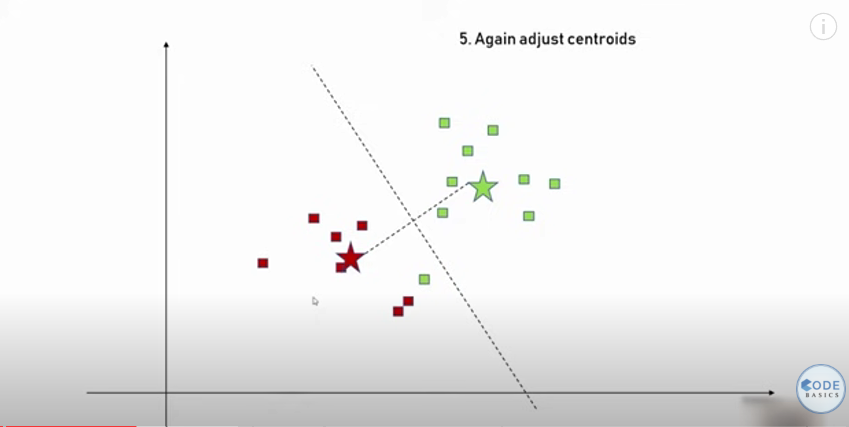

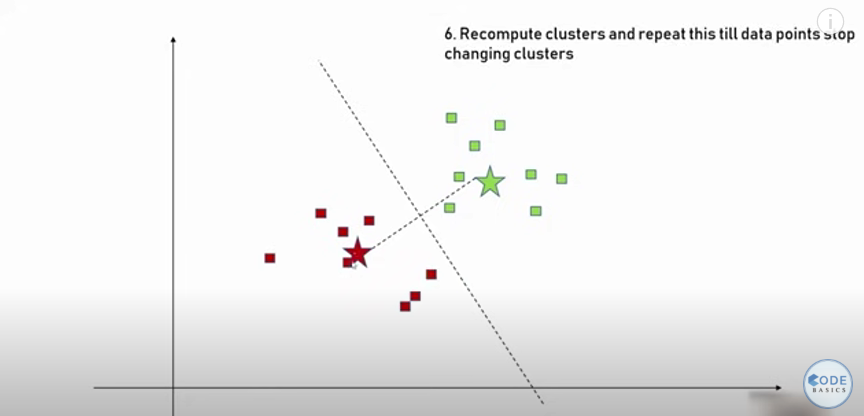

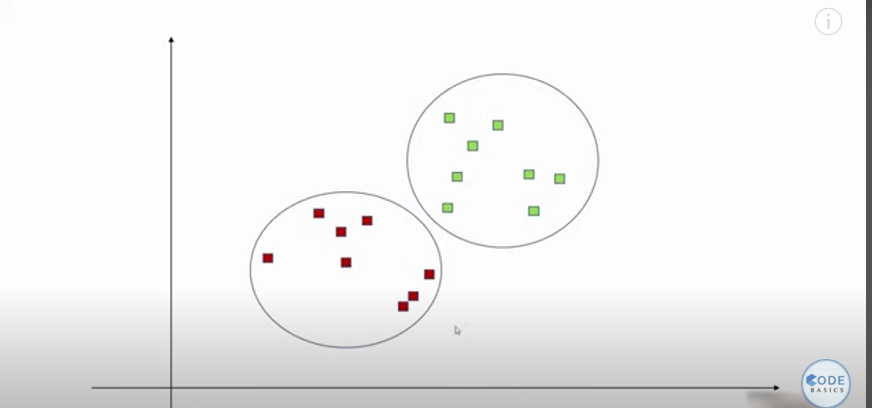

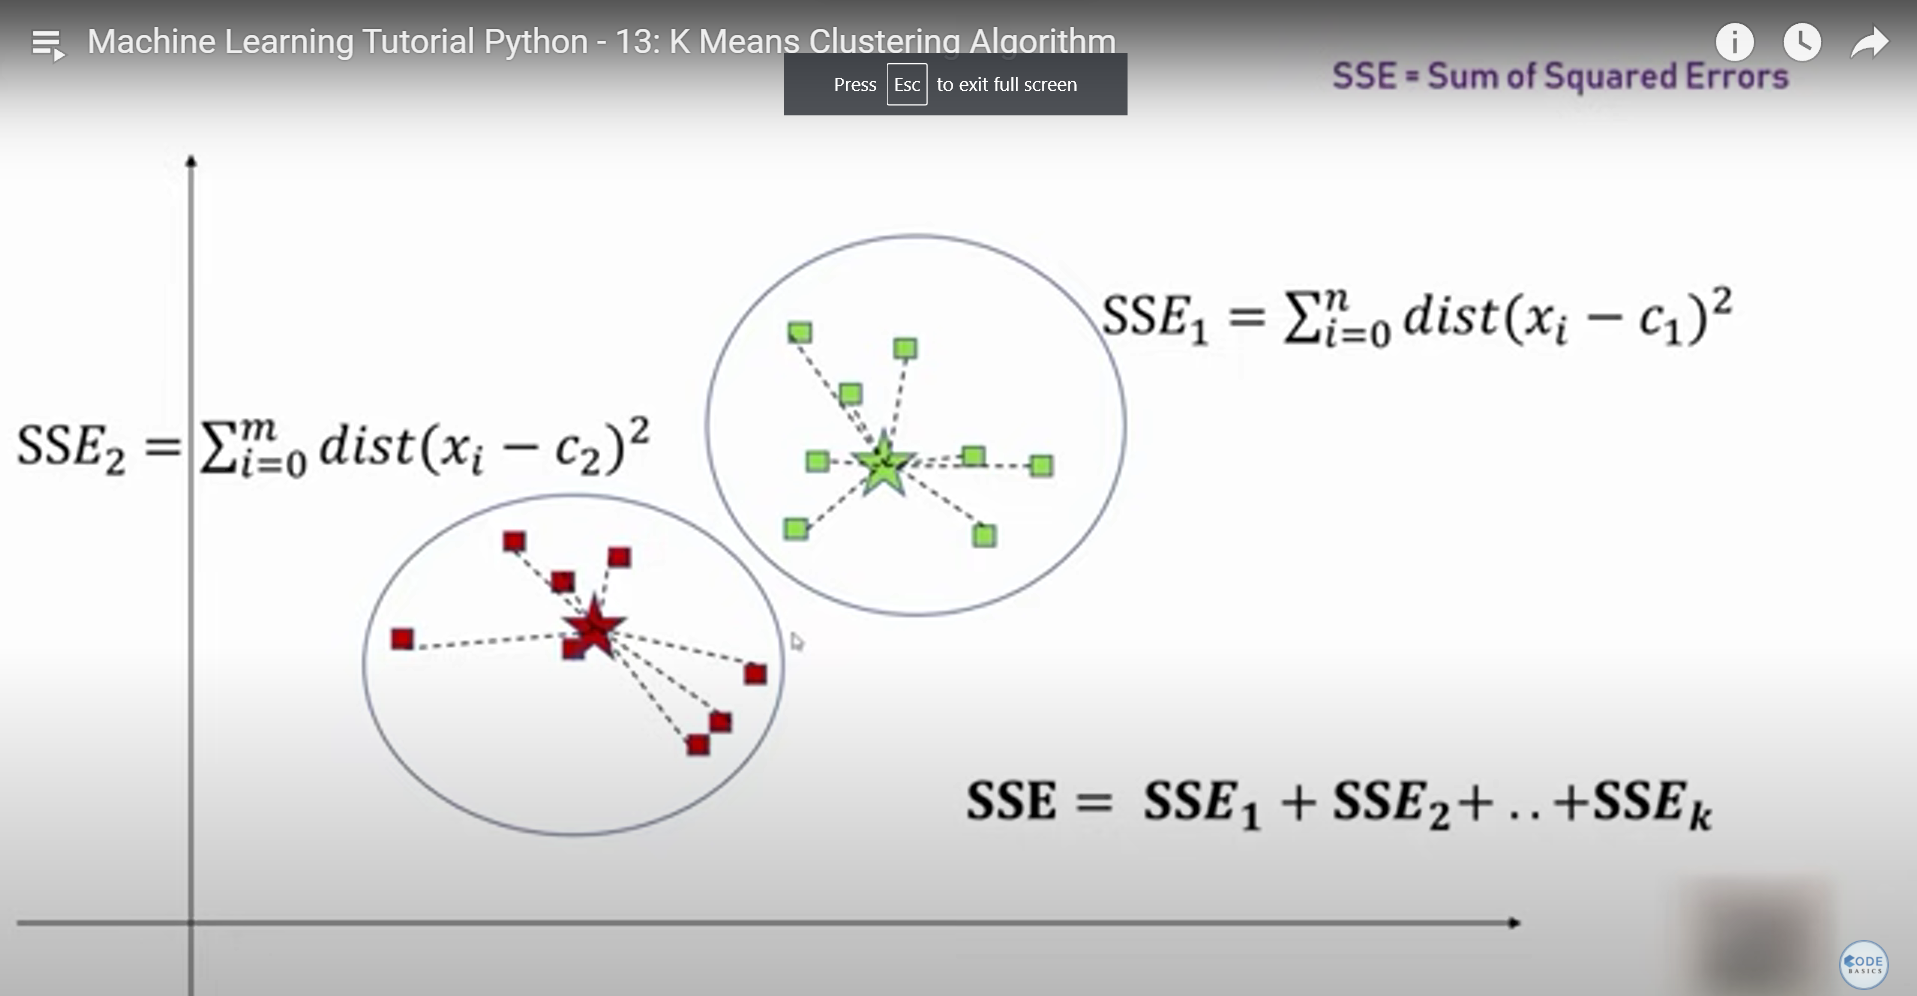

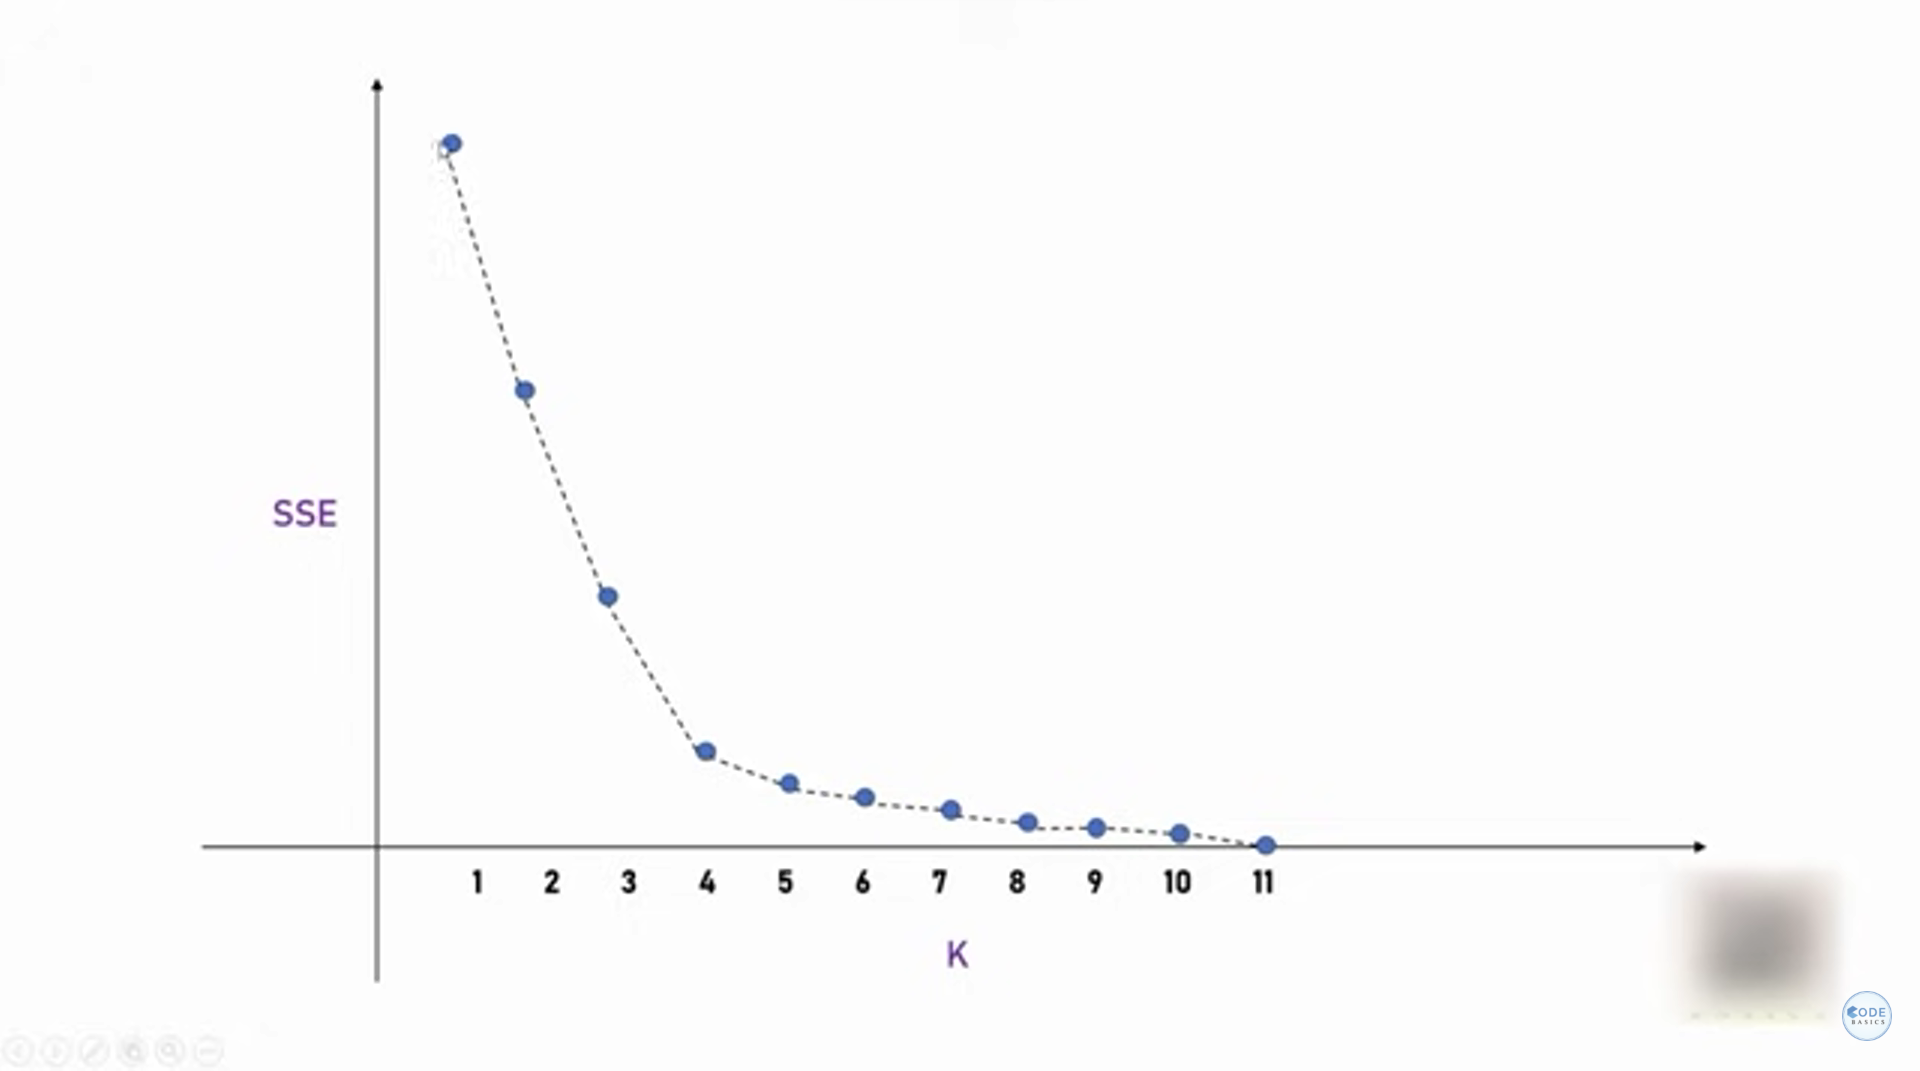

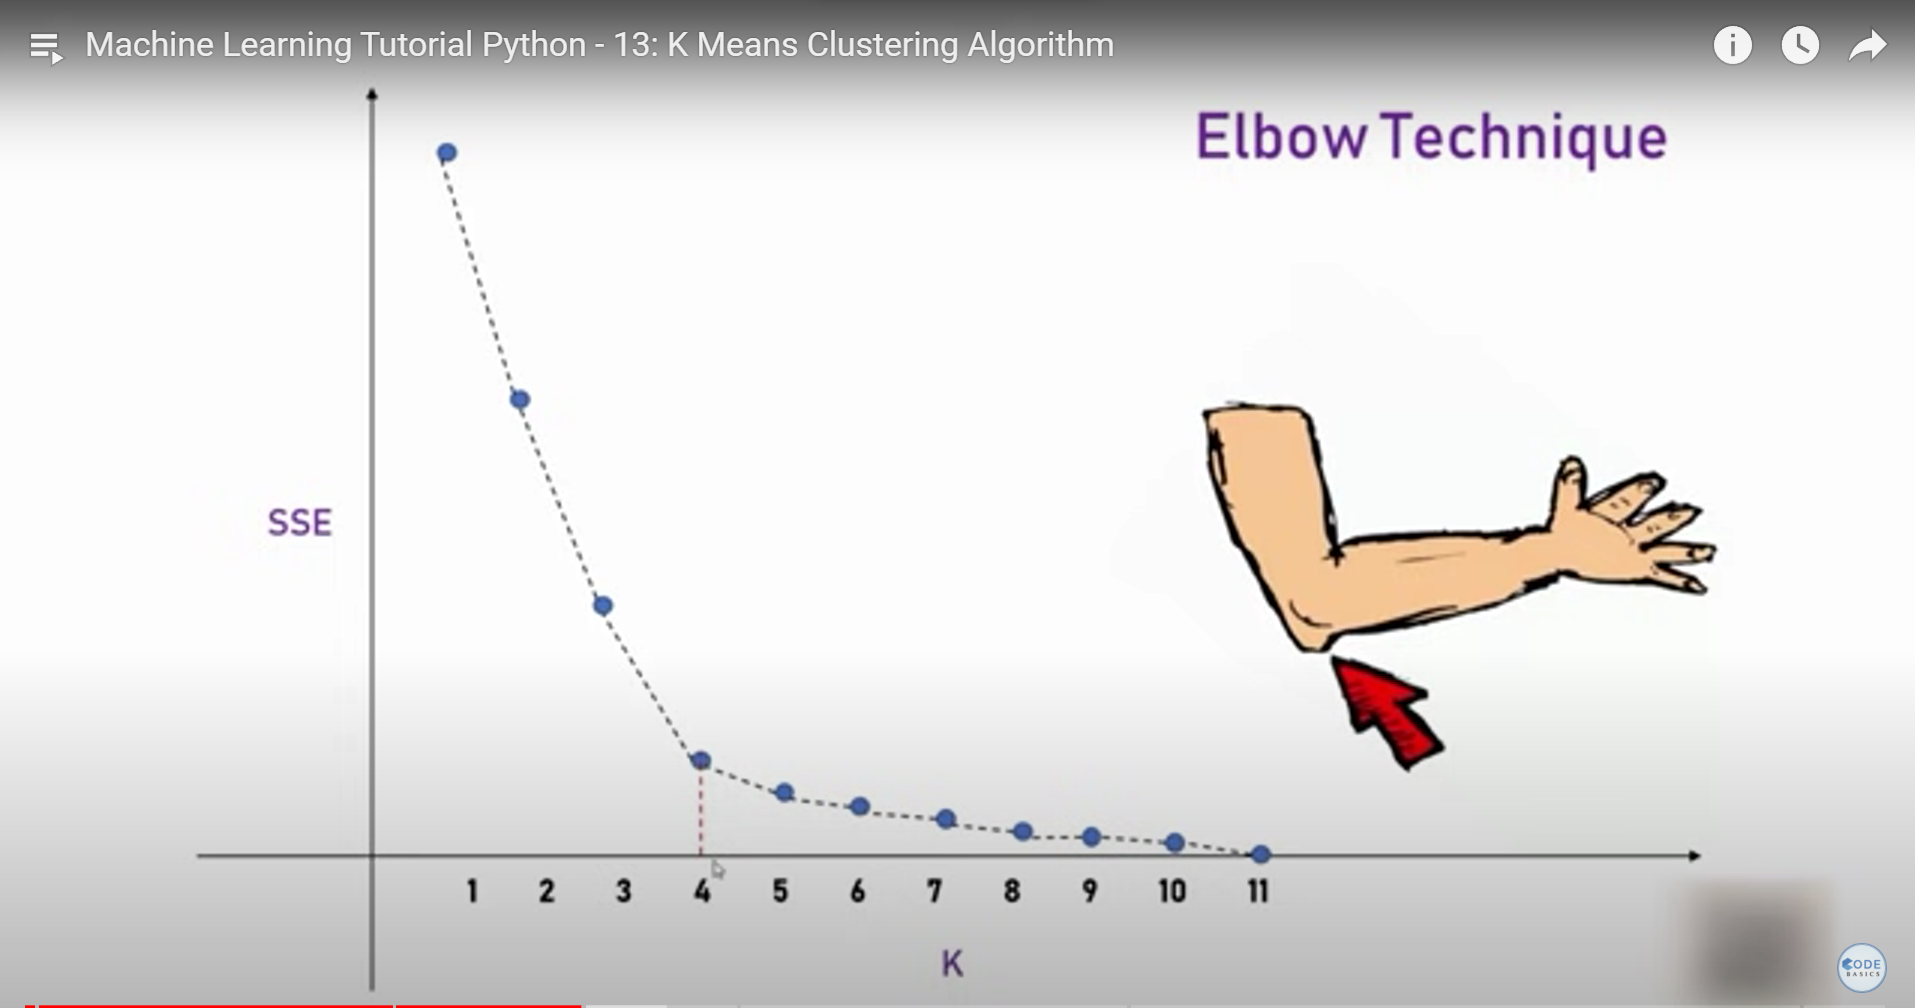

 We will consider the K for which SSE is towards minimum and using graph we can get good K value at elbow.

In [31]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
df=pd.read_csv(r"C:\Users\Ayush\OneDrive\Documents\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


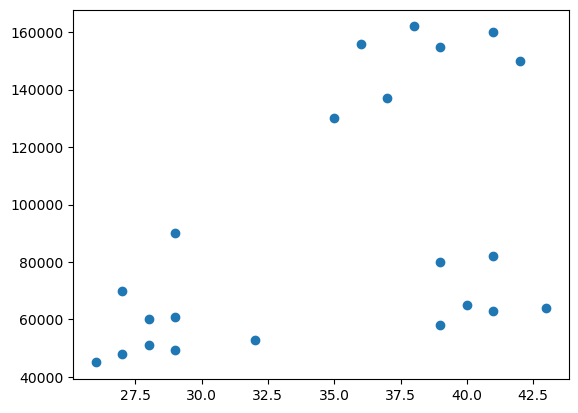

In [33]:
plt.scatter(df['Age'],df['Income($)'])

In [34]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [35]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

 It made three clusters assigning them three different values i.e,0,1,2

In [36]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


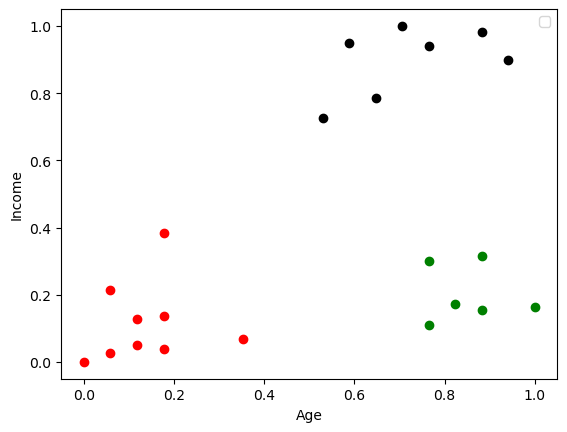

In [53]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [56]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelia,0.529412,0.726496,2


 some black and green dots are mixed but this is due to improper range of X (small range)and Y(very large range) axis.Now we will scale AGE and INCOME from 0 to 1 to overcome this issue.

In [103]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [104]:
df['cluster']=y_predicted
df.drop('cluster',axis='columns',inplace=True)


df


,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelia,0.529412,0.726496,2


In [105]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

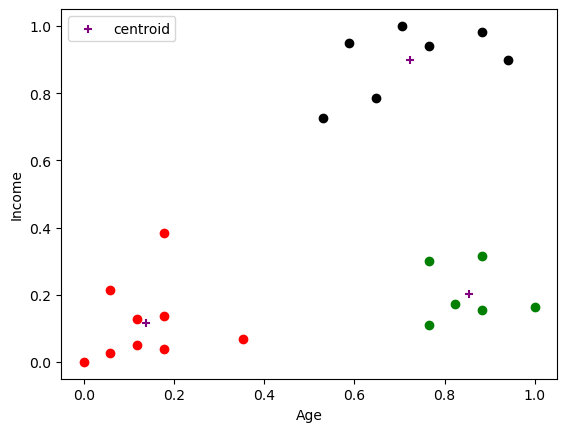

In [106]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]

plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [107]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [108]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.34910470944195643,
 0.27669362763002775,
 0.2203764169077066,
 0.16869711728567785,
 0.1376250414652804,
 0.11056185254866235]

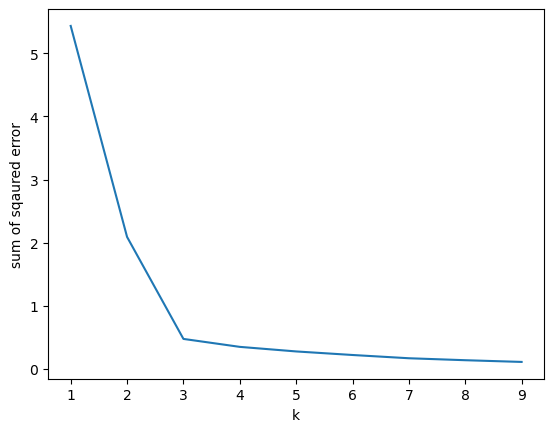

In [109]:
plt.xlabel("k")
plt.ylabel("sum of sqaured error")
plt.plot(k_rng,sse)

Therefore k=3 is suitable value as its our elbow

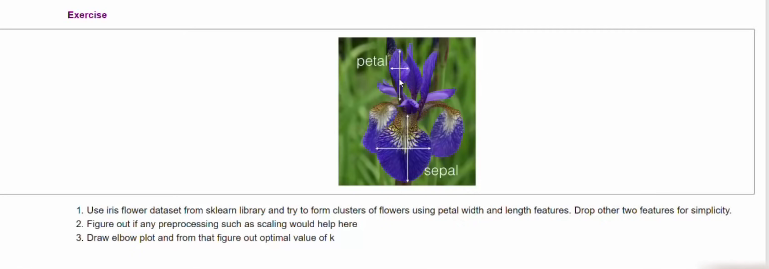

# Naive Bayes Classifier Algorithm

In [110]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Ayush\Downloads\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [113]:
target=df.Survived
inputs=df.drop(['Survived'],axis='columns')

In [114]:
dummies=pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [116]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [121]:
inputs.drop(['Sex'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [123]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

 This tells us that there is NA value in age

In [124]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [126]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [129]:
len(x_train)

712

In [130]:
len(x_test)

179

In [131]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [132]:
model.fit(x_train,y_train)

GaussianNB()

In [133]:
model.score(x_test,y_test)

0.7821229050279329

In [134]:
model.predict(x_test[:10])

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [135]:
y_test[:10]

792    0
590    0
277    0
266    0
770    0
565    0
318    1
805    0
722    0
861    0
Name: Survived, dtype: int64

In [137]:
model.predict_proba(x_test[:10])

array([[2.12627759e-02, 9.78737224e-01],
       [9.91220621e-01, 8.77937918e-03],
       [9.79089545e-01, 2.09104553e-02],
       [9.85242121e-01, 1.47578790e-02],
       [9.90341238e-01, 9.65876210e-03],
       [9.90255099e-01, 9.74490096e-03],
       [2.12443720e-07, 9.99999788e-01],
       [9.91055451e-01, 8.94454854e-03],
       [9.82085960e-01, 1.79140399e-02],
       [9.78754064e-01, 2.12459360e-02]])

Left side is probability of person to not survive and right is to survive in particular class

In [138]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Ayush\Downloads\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [140]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [141]:
df['spam']=df['Category'].apply(lambda x:1 if x== 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [1]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.25)

NameError: name 'df' is not defined

 Now we need to need to convert message text to numbers as we know that machine learning model can handle numbers and not alphabets and this we would do with help of COUNT VECTOR TECHNIQUE

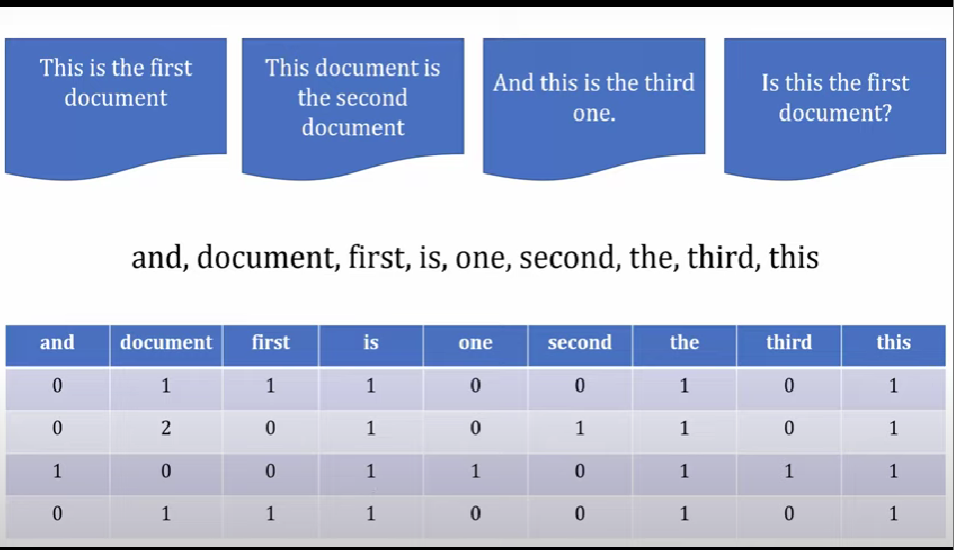

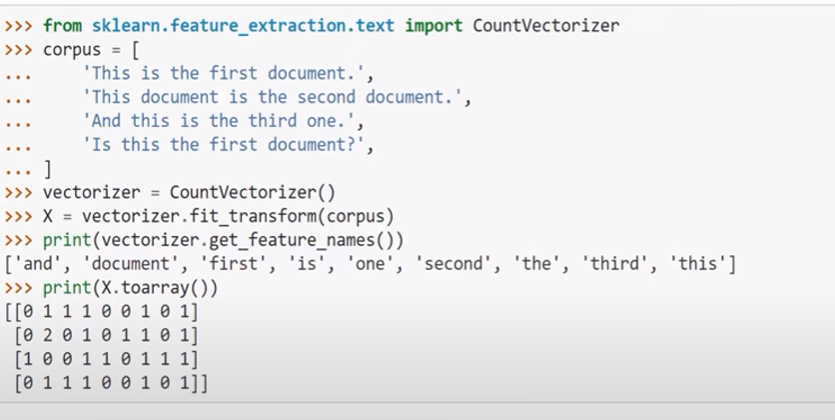

In [149]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
x_train_count=v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

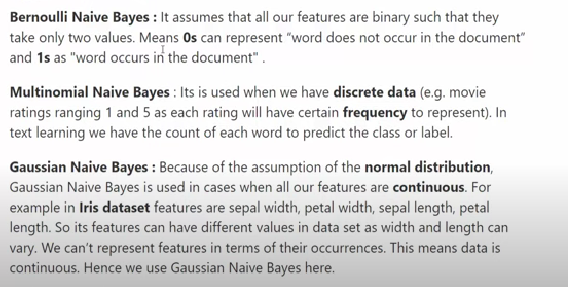

In [150]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [154]:
emails=[
    'Hey mohan,can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking,exclusive offer just for you'
]
emails_count=v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [156]:
x_test_count=v.transform(x_test)
model.score(x_test_count,y_test)

0.9798994974874372

 Using sklearn pipeline for transformation

In [159]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [160]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [161]:
clf.score(x_test,y_test)

0.9798994974874372

In [162]:
clf.predict(emails)

array([0, 1], dtype=int64)

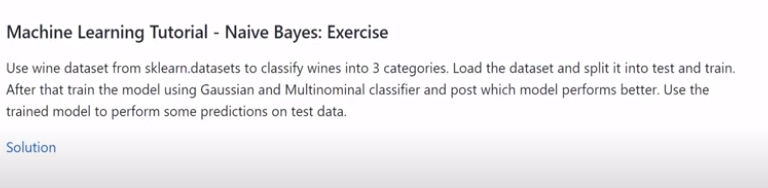

We have learnt so many models till now,they all have some parameters.The process of tuning the optimal parameter is called HYPERPARAMETER TUNING.

In [3]:
from sklearn import svm,datasets
iris=datasets.load_iris()

In [4]:
import pandas as pd
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower']=iris.target
df['flower']=df['flower'].apply(lambda x: iris.target_names[x])
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


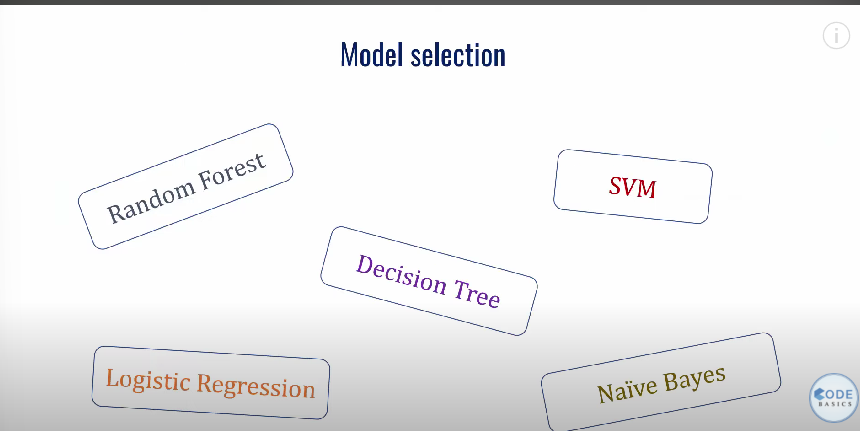

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3)

In [18]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9777777777777777

since score is changing depending on training and testing data set so we cant rely on this method.so we would do k fold method

In [19]:
 from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data,iris.target,cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [21]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [22]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [25]:
import numpy as np
kernels=['rbf','linear']
C=[1,10,20]
avg_scores={}
for kval in kernels:
    for cval in C:
        cv_scores=cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data,iris.target,cv=5)
        avg_scores[kval+'-'+str(cval)]=np.average(cv_scores)
avg_scores        

{'rbf-1': 0.9800000000000001,
 'rbf-10': 0.9800000000000001,
 'rbf-20': 0.9666666666666668,
 'linear-1': 0.9800000000000001,
 'linear-10': 0.9733333333333334,
 'linear-20': 0.9666666666666666}

In [26]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(svm.SVC(gamma='auto') ,{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)
clf.fit(iris.data,iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00168085, 0.00140595, 0.        , 0.00159941, 0.00165677,
        0.00190835]),
 'std_fit_time': array([0.0033617 , 0.00202084, 0.        , 0.00319881, 0.00215055,
        0.0013924 ]),
 'mean_score_time': array([0.00167813, 0.00020185, 0.00160131, 0.00160112, 0.00080175,
        0.00100136]),
 'std_score_time': array([0.00335627, 0.00040369, 0.00320263, 0.00320225, 0.00160351,
        0.00200272]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [27]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001681,0.003362,0.001678,0.003356,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001406,0.002021,0.000202,0.000404,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000000,0.000000,0.001601,0.003203,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001599,0.003199,0.001601,0.003202,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001657,0.002151,0.000802,0.001604,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001908,0.001392,0.001001,0.002003,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [30]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [31]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_fe

In [32]:
clf.best_score_

0.9800000000000001

In [33]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation

In [43]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,linear,0.966667
1,1,rbf,0.980000


# How about different models with different hyperparameters?

In [35]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [36]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 1}
2,logistic_regression,0.966667,{'C': 5}


Based on above, I can conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem of iris flower classification 

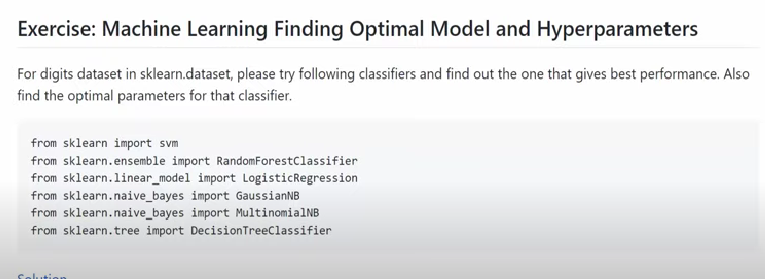

# L1 and L2 Regularization | Lasso, Ridge Regression

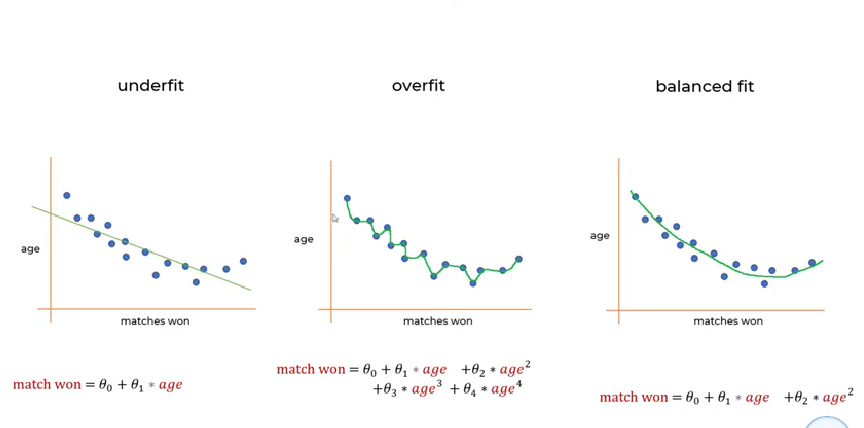

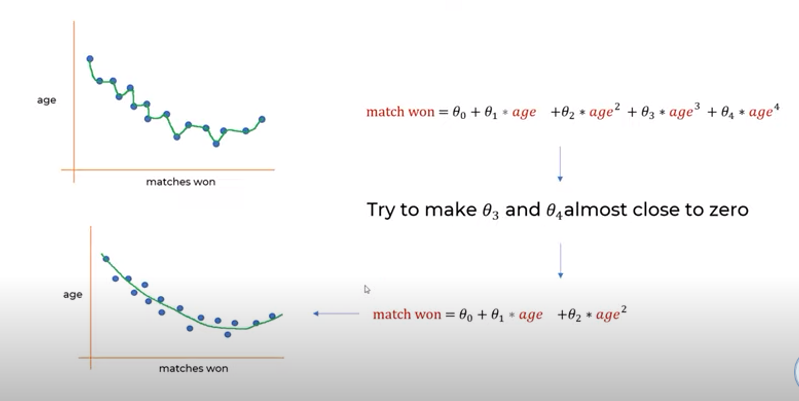

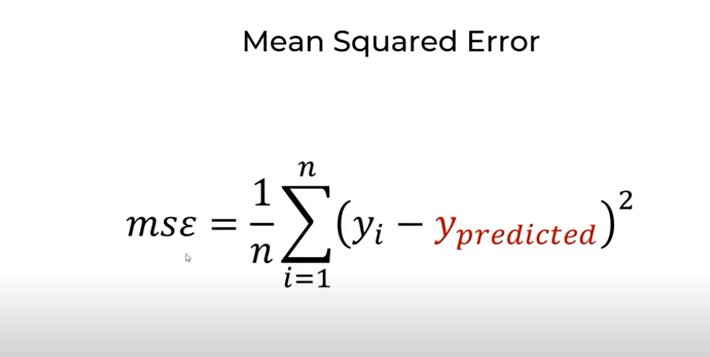 

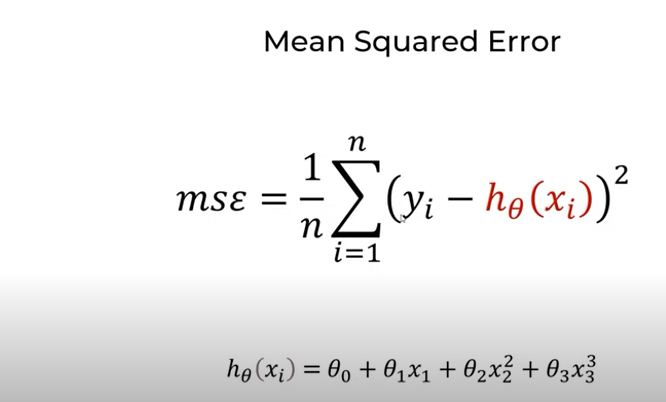

 here X1,X2,X3 are features such as sepal lenth,width,area,etc 

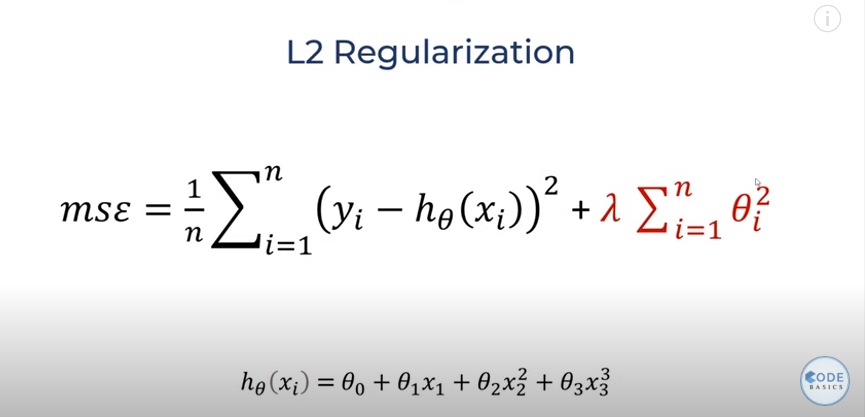

 therefore,We would have to keep THETA values small in order to keep MSE low 

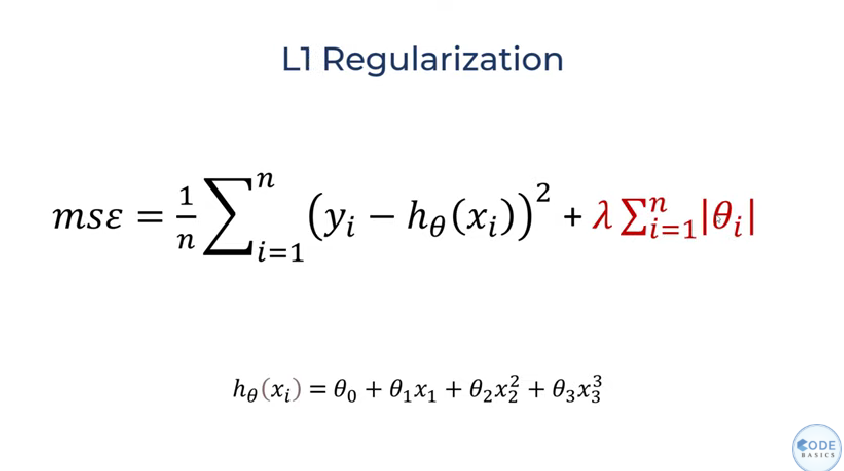

In [44]:
import pandas as pd
dataset=pd.read_csv(r"C:\Users\Ayush\OneDrive\Documents\melb_data.csv")
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [45]:
dataset.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [82]:
dataset.shape

(12211, 613)

In [83]:
cols_to_use=['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount',
            'Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Price']

In [84]:
dataset=dataset[cols_to_use]
dataset.head()

KeyError: "['Suburb', 'Type', 'Method', 'SellerG', 'Regionname', 'CouncilArea'] not in index"

In [85]:
dataset.shape

(12211, 613)

In [86]:
dataset.isna().sum()

Rooms                       0
Propertycount               0
Distance                    0
Bedroom2                    0
Bathroom                    0
                           ..
CouncilArea_Whitehorse      0
CouncilArea_Whittlesea      0
CouncilArea_Wyndham         0
CouncilArea_Yarra           0
CouncilArea_Yarra Ranges    0
Length: 613, dtype: int64

In [87]:
cols_to_fill_zero=['Propertycount','Distance','Bedroom2','Bathroom','Car']
dataset[cols_to_fill_zero]=dataset[cols_to_fill_zero].fillna(0)
dataset.isna().sum()

Rooms                       0
Propertycount               0
Distance                    0
Bedroom2                    0
Bathroom                    0
                           ..
CouncilArea_Whitehorse      0
CouncilArea_Whittlesea      0
CouncilArea_Wyndham         0
CouncilArea_Yarra           0
CouncilArea_Yarra Ranges    0
Length: 613, dtype: int64

In [88]:
dataset['Landsize']=dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea']=dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [89]:
dataset.isna().sum()

Rooms                       0
Propertycount               0
Distance                    0
Bedroom2                    0
Bathroom                    0
                           ..
CouncilArea_Whitehorse      0
CouncilArea_Whittlesea      0
CouncilArea_Wyndham         0
CouncilArea_Yarra           0
CouncilArea_Yarra Ranges    0
Length: 613, dtype: int64

In [90]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Rooms                       0
Propertycount               0
Distance                    0
Bedroom2                    0
Bathroom                    0
                           ..
CouncilArea_Whitehorse      0
CouncilArea_Whittlesea      0
CouncilArea_Wyndham         0
CouncilArea_Yarra           0
CouncilArea_Yarra Ranges    0
Length: 613, dtype: int64

In [91]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2,4019.0,2.5,2.0,1.0,1.0,202.0,151.96765,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.00000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.00000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,4019.0,2.5,3.0,2.0,1.0,94.0,151.96765,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.00000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


 Drop first to drop first column to prevent dummy data trap

In [107]:
x=dataset.drop('Price',axis=1)
y=dataset['Price']

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [117]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)

In [118]:
reg.score(x_test,y_test)

-998345369.4972584

In [119]:
reg.score(x_train,y_train)

0.712092741110876

In [123]:
from sklearn import linear_model

lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)

lasso_reg.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.272e+14, tolerance: 3.475e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

#Lasso is L1 reg. 

In [124]:
lasso_reg.score(x_test,y_test)

0.6635378648697849

In [125]:
lasso_reg.score(x_train,y_train)

0.7075207761454996

In [126]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [127]:
ridge_reg.score(x_test,y_test)

0.6644072458301125

In [128]:
ridge_reg.score(x_train,y_train)

0.6767113841211165

Ridge is L2 regression